# Regressão Logística Binária

Para está atividade iremos utilizar um dataset sobre fraudes em cartão de crédito obtido do [kaggle](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?select=card_transdata.csv).

Esse conjunto de dados possui as variáveis:

* distance_from_home - distância entre a casa e o local onde a transação foi feita.

* distance_from_last_transaction - a distância do local em que a última transação ocorreu.

* ratio_to_median_purchase_price - Razão entre preço da transação e o preço médio de transação.

* repeat_retailer - Se a transação ocorreu na mesma loja.

* used_chip - Se a transação foi feita com cartão de crédito.

* used_pin_number - Se a transação ocorreu usando número PIN.

* online_order - Se a transação foi online.

* fraud - Se a transação é fraudulenta.


## Atividade 1: Carregue os dados e verifique se há dados faltantes. Se houver, faça o tratamento que julgar adequado.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando os dados novamente
df = pd.read_csv('card_transdata.csv')

df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
# Verificando a presença de valores ausentes
missing_values = df.isnull().sum()

missing_values

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Obs: Na célula abaixo há um código para renomear as colunas.

In [4]:
# renomeando as colunas
df.columns = ['dist_casa','dist_ultima_transacao','razao_preco_medio',
              'loja_repetida','usou_chip','usou_pin','online','fraude']

## Atividade 2: Selecione as variáveis que achar interessante para tentar prever se houve ou não fraude.

In [5]:
# Selecionando as variáveis para o modelo
selected_features = ['dist_casa', 'dist_ultima_transacao', 'razao_preco_medio', 'usou_chip', 'usou_pin', 'online']

# Criando um novo DataFrame com as variáveis selecionadas
df_selected = df[selected_features + ['fraude']]

df_selected.head()

,dist_casa,dist_ultima_transacao,razao_preco_medio,usou_chip,usou_pin,online,fraude
0,57.877857,0.311140,1.945940,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,0.0,1.0,0.0


## Atividade 3: Verifique se há desbalanceamento da variável `fraude`. Se houver, faça um balanceamento de classes.

In [6]:
# Verificando o balanceamento da variável 'fraude'
class_balance = df_selected['fraude'].value_counts()

class_balance

0.0    912597
1.0     87403
Name: fraude, dtype: int64

Se as classes estiverem desbalanceadas execute o código a seguir.

Existem várias técnicas de balanceamento. Como temos muitas observações, vamos usar uma técnica chamada undersampling. Esta técnica consiste em descartar observações da classe que possui mais observações até que as duas classes tenham a mesma quantidade.

Por exemplo, se temos duas classes, uma com 1000 observações para a classe A e outra com 100 observações para a classe B, então iremos selecionar apenas 100 observações (aleatoriamente) da classe A dentre as 1000. Dessa maneira iremos ter 100 observações de cada classe.

In [8]:
# separando as variáveis X e y
X = df[['dist_casa', 'dist_ultima_transacao', 'razao_preco_medio', 'usou_chip', 'usou_pin', 'online']]
y = df['fraude']

# balanceando as classes com undersampling
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X, y = undersample.fit_resample(X, y)

In [9]:
# Verificando o balanceamento da variável 'fraude'
class_balance = y.value_counts()

class_balance

0.0    87403
1.0    87403
Name: fraude, dtype: int64

## Atividade 4: Crie um modelo de regressão logística.

In [10]:
# Importando a biblioteca statsmodels
import statsmodels.api as sm

# Adicionando uma constante ao conjunto de treinamento
X1 = sm.add_constant(X)

# Criando o modelo de regressão logística
modelo = sm.Logit(y, X1).fit(method='newton')

# Imprimindo o resumo do modelo
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.216641
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 fraude   No. Observations:               174806
Model:                          Logit   Df Residuals:                   174799
Method:                           MLE   Df Model:                            6
Date:                Fri, 28 Jul 2023   Pseudo R-squ.:                  0.6875
Time:                        21:00:37   Log-Likelihood:                -37870.
converged:                       True   LL-Null:                   -1.2117e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -8.3377      0.053   -158.720      0.000      -8.441      -8

In [ ]:
# seu código

## Atividade 5: Verifique os parâmetros do modelo e se eles são relevantes.

In [11]:
modelo.params

const                    -8.337663
dist_casa                 0.026306
dist_ultima_transacao     0.049033
razao_preco_medio         1.184170
usou_chip                -1.190430
usou_pin                -10.016419
online                    4.600707
dtype: float64

## Atividade 6: Crie a matriz de confusão e o mapa de calor correspondente.


In [12]:
modelo.predict(X1)

0         0.044390
1         0.001505
2         0.015700
3         0.040208
4         0.000636
            ...   
174801    0.999660
174802    0.738635
174803    0.514241
174804    1.000000
174805    0.999819
Length: 174806, dtype: float64

In [14]:
y_pred = (modelo.predict(X1) >= 0.5).astype(int)

In [15]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y, y_pred)
matriz_confusao

array([[81467,  5936],
       [ 4347, 83056]], dtype=int64)

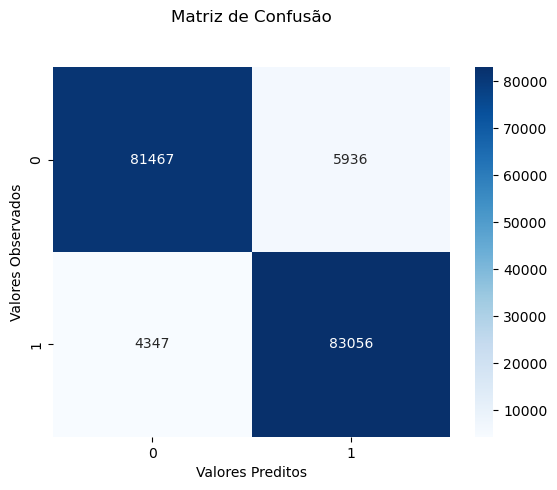

In [18]:
# criando mapa de calor
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

## Atividade 7: Verifique as outras métricas (sensibilidade, especificidade, f1-score).

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     87403
         1.0       0.93      0.95      0.94     87403

    accuracy                           0.94    174806
   macro avg       0.94      0.94      0.94    174806
weighted avg       0.94      0.94      0.94    174806



## Atividade 8: Crie a curva ROC para este modelo.

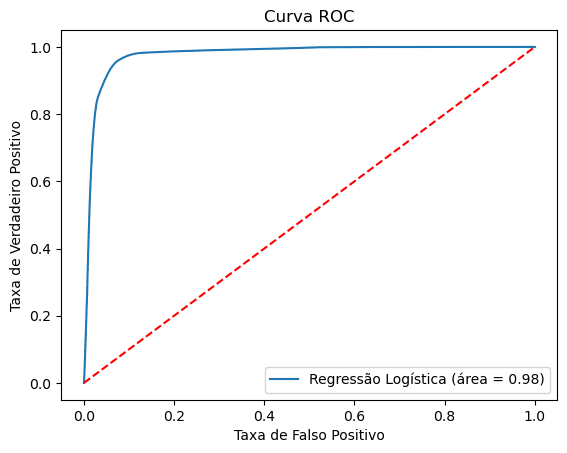

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

logit_roc_auc = roc_auc_score(y, modelo.predict(X1))
fpr, tpr, thresholds = roc_curve(y, modelo.predict(X1))
plt.plot(fpr, tpr, label=f'Regressão Logística (área = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right");

## Atividade 9: Preveja se uma transação com as características abaixo é ou não fraude.

* `dist_casa = 82`
* `dist_ultima_transacao = 13`
* `razao_preco_medio = 14`
* `loja_repetida = 1`
* `usou_chip = 0`
* `usou_pin = 0`
* `online = 1`

In [26]:
# Definindo as características da transação
transaction = pd.DataFrame(data=[[1, 82, 13, 14, 0, 0, 1]], 
                           columns=['const','dist_casa', 'dist_ultima_transacao', 'razao_preco_medio', 'usou_chip', 'usou_pin', 'online'])

# Fazendo a previsão com o modelo
fraud_prediction = modelo.predict(transaction)

fraud_prediction

0    1.0
dtype: float64

## Atividade 10: Refaça os exercícios sem realizar o balanceamento de classe e verifique se ocorre algum problema.

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código

In [ ]:
# seu código